In [1]:
import os
os.chdir(r"C:\Users\TYC\Documents\Year 2 Sem 3 Resources\MP\Tutorial Notes\Week 7")

import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

### Q1. Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.


In [2]:
img = cv.imread('lena.jfif', 0)

img = cv.equalizeHist(img)

hist = cv.equalizeHist(img)

compare = cv.subtract(hist, img)

cv.imshow('result',np.hstack((img, hist, compare))) #not too sure why there's a difference
cv.waitKey(0)
cv.destroyAllWindows()

### Q2. Load the image 'electronic.jfif'. Then,
#### A. Experiment with different kernel size. Which kernel size is the most appropriate?
#### B. Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.
#### C. Try Laplacian of Gaussian
#### Based on the exercise conducted from (A) - (C), which image processing pathway is optimal? Justify your answer.

In [3]:
#A
thresh = 110

def thresh_callback(val):
    kernel_size = val
    #ret, th = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
    sobelx = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 1, 0, ksize=kernel_size))
    sobely = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 0, 1, ksize=kernel_size))
    sobelxy = cv.bitwise_or(sobelx,sobely)
    cv.imshow('result', sobelxy)
    
img = cv.imread('electronic.jfif', 0)
img = cv.medianBlur(img, 3)
name_window='source'
cv.namedWindow(name_window)
cv.imshow(name_window,img)

max_thresh = 10
thresh = 1
cv.createTrackbar('ksize: ', name_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)

cv.waitKey(0)
cv.destroyAllWindows() 

#Kernel size 1 seems to be the most appropriate (it is sufficient to capture most edges with minimum background noise)

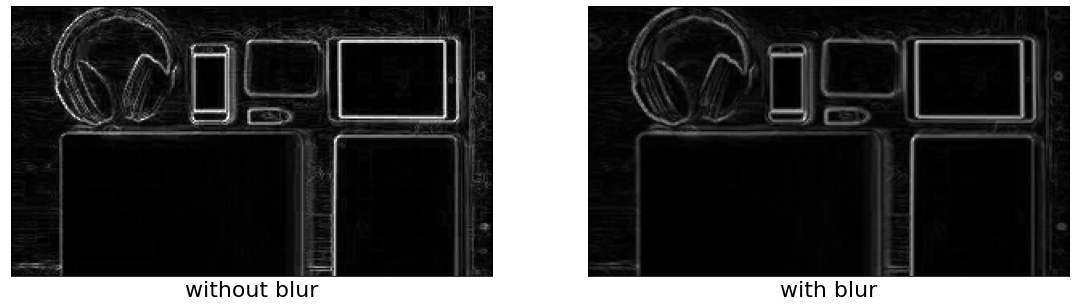

In [4]:
#B
img = cv.imread('electronic.jfif', 0)

#ret1, th1 = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
sobelx1 = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 1, 0, ksize=1))
sobely1 = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 0, 1, ksize=1))
sobelxy1 = cv.bitwise_or(sobelx1,sobely1)

img=cv.GaussianBlur(img,(3,3),0)
#ret2, th2 = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
sobelx2 = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 1, 0, ksize=1))
sobely2 = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 0, 1, ksize=1))
sobelxy2 = cv.bitwise_or(sobelx2,sobely2)

windowname = ["without blur","with blur"]
output = [sobelxy1,sobelxy2]

fig=plt.figure(figsize=(50,50))
plt.rc('font', **{'size'   : 22})
for i in range(len(output)):
    plt.subplot(1,5,i+1)
    output[i]=cv.cvtColor(output[i],cv.COLOR_BGR2RGB)
    plt.imshow(output[i])
    plt.xlabel(windowname[i])
    plt.xticks([])
    plt.yticks([])

In [5]:
#C
img = cv.imread('electronic.jfif', 0)

gaussian = cv.GaussianBlur(img, (5,5), 0)

laplacian = cv.Laplacian(gaussian, cv.CV_64F, ksize = 3)
laplacian = np.uint8(np.absolute(laplacian))

cv.imshow('Laplacian of Gaussian', laplacian)

cv.waitKey(0)
cv.destroyAllWindows()

### Q3. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.


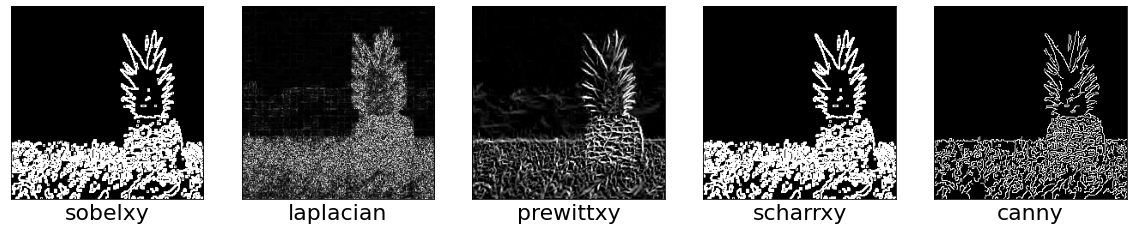

In [6]:
img = cv.imread('pineapple.jfif', 0)

#Sobel
ret, th = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
sobelx = cv.convertScaleAbs(cv.Sobel(th, cv.CV_64F, 1, 0, ksize=3))
sobely = cv.convertScaleAbs(cv.Sobel(th, cv.CV_64F, 0, 1, ksize=3))
sobelxy = cv.bitwise_or(sobelx,sobely)
    
#Laplacian
laplacian = cv.Laplacian(img, cv.CV_64F, ksize = 3)
laplacian = np.uint8(np.absolute(laplacian))

#Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)
prewittxy = cv.bitwise_or(prewittx,prewitty)

#Scharr
ret, th = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
scharrx = cv.convertScaleAbs(cv.Scharr(th, cv.CV_64F, 1, 0))
scharry = cv.convertScaleAbs(cv.Scharr(th, cv.CV_64F, 0, 1))
scharrxy = cv.bitwise_or(scharrx,scharry)

#Canny
canny = cv.Canny(img, 110, 255, 3)

windowname = ["sobelxy","laplacian","prewittxy","scharrxy","canny"]
output = [sobelxy,laplacian,prewittxy,scharrxy,canny]

fig=plt.figure(figsize=(20,20))
plt.rc('font', **{'size'   : 22})
for i in range(len(output)):
    plt.subplot(1,5,i+1)
    output[i]=cv.cvtColor(output[i],cv.COLOR_BGR2RGB)
    plt.imshow(output[i])
    plt.xlabel(windowname[i])
    plt.xticks([])
    plt.yticks([])
    
cv.waitKey(0)
cv.destroyAllWindows()

### Q4. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [7]:
img = cv.imread('electronic.jfif')
img= cv.bilateralFilter(img,8,20,5)
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
canny = cv.Canny(gray, 127, 255, 3)

#1: Grayscale image
img = cv.imread('electronic.jfif')
img_copy = cv.bilateralFilter(img,8,20,5)
img_copy = cv.GaussianBlur(img_copy, (7,7), 0)

#2 Apply binary thresholding
canny = cv.Canny(img_copy, 110, 255, 3)

#3: Find and draw contours
contours, hierarchy = cv.findContours(canny, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_copy, contours, -1, (0, 255, 0), 1, cv.LINE_AA)

perimeter=cv.arcLength(contours[0],True)
for i in range(len(contours)):
    if(cv.arcLength(contours[i],True)>perimeter):
        index=i
        perimeter=cv.arcLength(contours[i],True)

#index=1
cnt = contours[index]
x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()